In [1]:
from imagizer_cv import spatial_imagizer, get_spotdist, get_img_coord
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import cv2
import scanorama
import math

/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
tissue_dirs= ['./Data/PSAPP_CO1/',
              './Data/PSAPP_CO2/',
              './Data/PSAPP_CO3/',
              './Data/PSAPP_TAM1/',
              './Data/PSAPP_TAM2/',
              './Data/PSAPP_TAM3/']
metafile = None

In [3]:
adatas=[]
for tissue_dir in tissue_dirs:
    adata1 = sc.read_visium(tissue_dir) 
    adata1.var_names_make_unique()
    sc.pp.normalize_total(adata1, inplace=True)
    sc.pp.log1p(adata1)
    sc.pp.highly_variable_genes(adata1, flavor="seurat", n_top_genes=2000)
    adatas.append(adata1)


/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/anndata/_core/anndata.py

In [4]:
hvg_list = []
for adata in adatas:
    hvg_list.extend(adata.var.index[adata.var.highly_variable].tolist())

hvg_genes_all= list(set(hvg_list))
hvg_sel =[]
sel_no = len(adatas)
for ii in hvg_genes_all:
    c= hvg_list.count(ii)    
    if c >= sel_no:
        hvg_sel.append(ii)

print(len(hvg_sel))

427


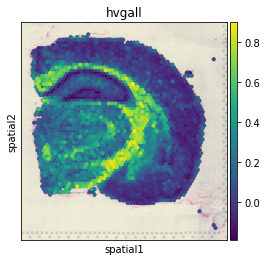

In [5]:
for adata in adatas:
    sc.tl.score_genes(adata, hvg_sel, score_name = 'hvgall')
sc.pl.spatial(adatas[0], color = 'hvgall',img_key = 'lowres', size=2.0)

### Load Data for Imagizer

In [6]:
ts_meta_coords, tsimgs, imscales = [],[],[]

for tissue_dir in tissue_dirs:
    ts_meta_coord1,tsimg1, imscale1 = get_img_coord(tissue_dir, metafile, barcode_tag = '', hires=0)
    ts_meta_coords.append(ts_meta_coord1)
    tsimgs.append(tsimg1)
    imscales.append(imscale1)
    

{'spot_diameter_fullres': 28.54368441753777, 'tissue_hires_scalef': 0.545405, 'fiducial_diameter_fullres': 46.109028674484094, 'tissue_lowres_scalef': 0.16362149}
{'spot_diameter_fullres': 28.5391702973607, 'tissue_hires_scalef': 0.545405, 'fiducial_diameter_fullres': 46.10173663419806, 'tissue_lowres_scalef': 0.16362149}
{'spot_diameter_fullres': 29.44956512300091, 'tissue_hires_scalef': 0.5625879, 'fiducial_diameter_fullres': 47.572374429463004, 'tissue_lowres_scalef': 0.16877638}
{'spot_diameter_fullres': 28.555282540197144, 'tissue_hires_scalef': 0.545405, 'fiducial_diameter_fullres': 46.127764103395386, 'tissue_lowres_scalef': 0.16362149}
{'spot_diameter_fullres': 28.556496956955424, 'tissue_hires_scalef': 0.545405, 'fiducial_diameter_fullres': 46.12972585354338, 'tissue_lowres_scalef': 0.16362149}
{'spot_diameter_fullres': 28.54113393530366, 'tissue_hires_scalef': 0.545405, 'fiducial_diameter_fullres': 46.10490866472129, 'tissue_lowres_scalef': 0.16362149}


/home/hychoi/DATA1/Data/Visium_PSAPPmice_AD_GSE203424/imagizer_cv.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imcoord_tissue.barcodes = [bname + barcode_tag for bname in imcoord_tissue.barcodes]
/home/hychoi/DATA1/Data/Visium_PSAPPmice_AD_GSE203424/imagizer_cv.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imcoord_tissue.barcodes = [bname + barcode_tag for bname in imcoord_tissue.barcodes]
/home/hychoi/DATA1/Data/Visium_PSAPPmice_AD_GSE203424/imagizer_cv.py:33: SettingWithCopyWarning: 
A valu

In [7]:
spotdists=[]
for ts_meta_coord1, imscale1 in zip(ts_meta_coords, imscales):
    spotdists.append(get_spotdist(ts_meta_coord1,imscale1))
print(spotdists)

[7.185117604347826, 7.185360817264958, 7.650047754693877, 7.1861502785483875, 7.188345795966387, 7.183612724423077]


In [8]:
ts_meta_coords_ = []
for adata1, ts_meta_coord1 in zip(adatas, ts_meta_coords):
    ts_meta_coords_.append(pd.merge(adata1.obs,ts_meta_coord1,how = 'inner', right_on ='barcodes' , left_on=adata1.obs.index  ))
    

### Cluster Count Images

In [9]:
from utils import shape_matching

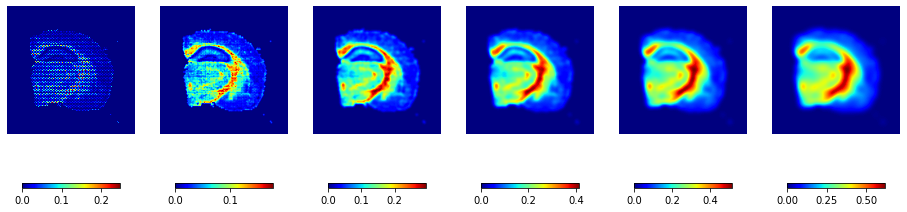

In [10]:
## Check best parameters
val_radius = [0.5,1,2,3,4,5] #Spot distance와의 배수에 따라 특정 feature의 95% count가 잡히는 영역으로 정의. 해당 가정에 따라 작을수록 덜뭉개지고 커질수록 뭉개지도록 그려짐 
targetsize = (128,128)

plt.figure(figsize=(16,6))
for jj, val in enumerate(val_radius):
    im_alls= [] 
    for ii in range(len(adatas)):
        im_alls.append(spatial_imagizer(adatas[ii].obs.hvgall - np.min(adatas[ii].obs.hvgall),
                                       tsimgs[ii],
                                       ts_meta_coords_[ii],
                                       imscales[ii],
                                       radius=spotdists[ii]*val,
                                       alpha=0.01))
        im_alls[ii] = cv2.resize(shape_matching(im_alls[ii], (600,600)), targetsize)
    plt.subplot(1,len(val_radius),jj+1)
    plt.imshow(im_alls[0],cmap='jet', vmin=0,vmax=None)
    plt.colorbar(fraction=0.015, orientation="horizontal")
    plt.axis('off')

### Evaluation Metric

In [11]:
#USE THIS IF WE DON"T WANT TO USE AGAIN SCANORAMA AND SCORES

titles=['PSAPP_CO1','PSAPP_CO2','PSAPP_CO3','PSAPP_TAM1','PSAPP_TAM2','PSAPP_TAM3']
adatas_cor=[]

for ee in range(len(adatas)):
    adatas_cor.append(sc.read_h5ad('./out/adata_{}_spatial_clustermap.h5ad'.format(ee)))
    
###--> Jump to EVALUATION@!!!+

In [11]:
titles=['PSAPP_CO1','PSAPP_CO2','PSAPP_CO3','PSAPP_TAM1','PSAPP_TAM2','PSAPP_TAM3']
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)
for adata, lid in zip(adatas_cor, titles):
    adata.obs_names_make_unique()
    adata.obs['library_id'] = lid

Found 32285 genes among all datasets
[[0.         0.62168397 0.33760527 0.49578909 0.42914683 0.13441441]
 [0.         0.         0.28604383 0.53094963 0.68858131 0.10486486]
 [0.         0.         0.         0.45115894 0.28102664 0.86134106]
 [0.         0.         0.         0.         0.69265757 0.45081081]
 [0.         0.         0.         0.         0.         0.50990991]
 [0.         0.         0.         0.         0.         0.        ]]
Processing datasets (2, 5)
Processing datasets (3, 4)
Processing datasets (1, 4)
Processing datasets (0, 1)
Processing datasets (1, 3)
Processing datasets (4, 5)
Processing datasets (0, 3)
Processing datasets (2, 3)
Processing datasets (3, 5)
Processing datasets (0, 4)
Processing datasets (0, 2)
Processing datasets (1, 2)
Processing datasets (2, 4)
Processing datasets (0, 5)
Processing datasets (1, 5)


In [36]:
adata_spatial = sc.concat(adatas_cor)

/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [37]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters", resolution = 0.1)

In [59]:
sc.tl.rank_genes_groups(adata_spatial, 'clusters', method='wilcoxon')
num_markers = 15
genelists=adata_spatial.uns['rank_genes_groups']['names']
df_genelists = pd.DataFrame.from_records(genelists)
df_markers = df_genelists.head(num_markers)

sc.tl.score_genes(adata_spatial, df_markers['0'].tolist(), score_name = 'Cluster0')
sc.tl.score_genes(adata_spatial, df_markers['1'].tolist(), score_name = 'Cluster1')
sc.tl.score_genes(adata_spatial, df_markers['2'].tolist(), score_name = 'Cluster2')
sc.tl.score_genes(adata_spatial, df_markers['3'].tolist(), score_name = 'Cluster3')
sc.tl.score_genes(adata_spatial, df_markers['4'].tolist(), score_name = 'Cluster4')

/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[g

In [60]:
for jj in ['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4']:
    v= np.asarray(adata_spatial.obs[jj])
    adata_spatial.obs[jj] = (v - v.min()) / (v.max() - v.min())

In [61]:
for adata,lid in zip(adatas_cor, titles):
    adata.obs = adata_spatial[adata_spatial.obs['library_id'] == lid].obs

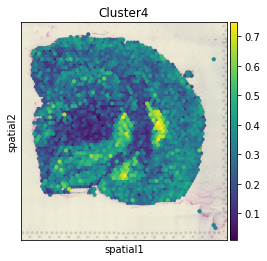

In [62]:
sc.pl.spatial(adatas_cor[0], color = 'Cluster4',img_key = 'lowres', size=2.0)

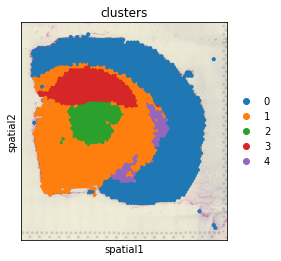

In [63]:
sc.pl.spatial(adatas_cor[0], color = 'clusters',img_key = 'lowres', size=2.0)

### Spatial Registration


In [12]:
def mol2imgs(adatas, tsimgs,ts_meta_coords_,imscales,spotdists,
             feature,mapping_all,  tsimg_output=(600,600), targetsize=(128,128),radius_val=3,alpha=0.01):
    molimgs=[]
    for ii in range(len(adatas)):
        if feature in adatas[ii].obs.columns:
            ad1_1 = spatial_imagizer(np.asarray(adatas[ii].obs[feature]),
                           tsimgs[ii],
                           ts_meta_coords_[ii],
                           imscales[ii],
                           radius=spotdists[ii]*radius_val,
                           alpha=alpha)
        else:
            ad1_1 = spatial_imagizer(np.asarray(adatas[ii][:,feature].X.todense()),
                                       tsimgs[ii],
                                       ts_meta_coords_[ii],
                                       imscales[ii],
                                       radius=spotdists[ii]*radius_val,
                                       alpha=alpha)
        #if ii in inverse_idx:
        #    ad1_1 = np.fliplr(ad1_1)
        ad1_1 = shape_matching(ad1_1, tsimg_output) #To ... Tsimg output 
        ad1_1 = cv2.resize(ad1_1, targetsize)  #To Resize
        
        ad1_1= mapping_all[ii].transform(ad1_1) #Saved Mapping
        #ad1_1 = gaussian_filter(ad1_1, sigma)
        molimgs.append(ad1_1)
    return molimgs
        


/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/dipy/viz/__init__.py:31: UserWarning: You do not have FURY installed. Some visualization functions might not work for you. For installation instructions, please visit: https://fury.gl/
  warnings.warn(


COM matching Done
1.0550799909671373
Rigid Transform Done
0.9661772549414755
Affine Registration Done
COM matching Done
0.29838424361318483
Rigid Transform Done
0.2745573404608792
Affine Registration Done
COM matching Done
0.2282825001560963
Rigid Transform Done
0.24797539550352043
Affine Registration Done
COM matching Done
0.31276317117286356
Rigid Transform Done
0.2530900812071075
Affine Registration Done
COM matching Done
0.3292670036695806
Rigid Transform Done
0.24687558988171465
Affine Registration Done
COM matching Done
0.3174905827374478
Rigid Transform Done
0.24154714785183645
Affine Registration Done
,,,,,,,,,, 1
COM matching Done
1.6788778310197487
Rigid Transform Done
1.6212318332863511
Affine Registration Done


/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/dipy/viz/regtools.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, len(imgs))


COM matching Done
0.6095799260147149
Rigid Transform Done
0.6634343482218238
Affine Registration Done
COM matching Done
0.5979248195765483
Rigid Transform Done
0.6371532896694334
Affine Registration Done
COM matching Done
0.5395869708212644
Rigid Transform Done
0.6322866866025975
Affine Registration Done
COM matching Done
0.6473576313917402
Rigid Transform Done
0.6850433975719475
Affine Registration Done
COM matching Done
0.6116443953345823
Rigid Transform Done
0.6949783511849248
Affine Registration Done
,,,,,,,,,, 2
COM matching Done
1.7941220531452164
Rigid Transform Done
1.7617913324755026
Affine Registration Done
COM matching Done
0.6986165898773036
Rigid Transform Done
0.7075619560597246
Affine Registration Done
COM matching Done
0.6768122875845926
Rigid Transform Done
0.7662753173390391
Affine Registration Done
COM matching Done
0.6283359235409265
Rigid Transform Done
0.7307520339593017
Affine Registration Done
COM matching Done
0.6749166729652168
Rigid Transform Done
0.699266359

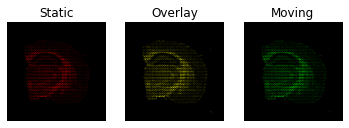

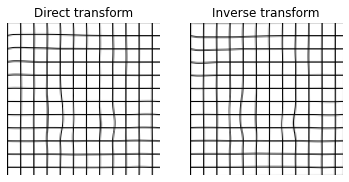

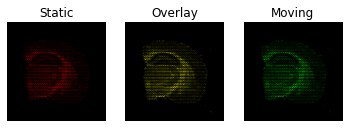

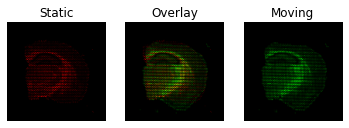

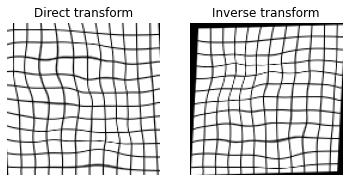

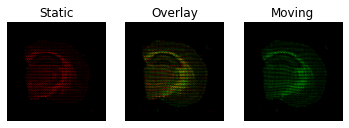

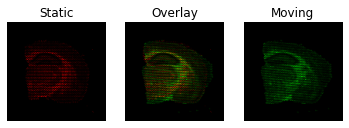

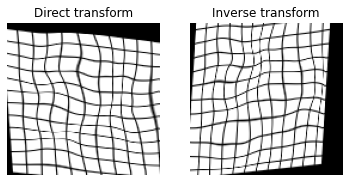

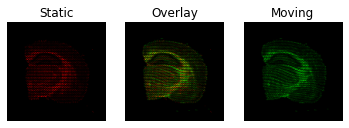

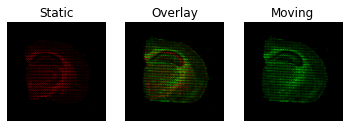

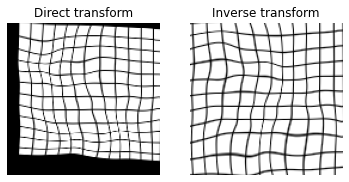

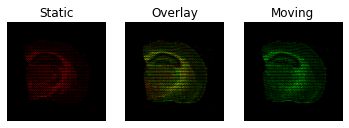

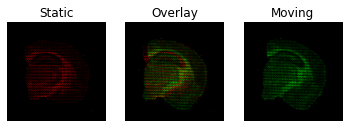

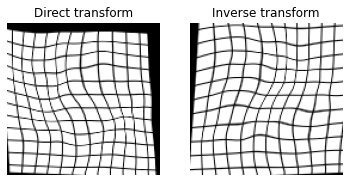

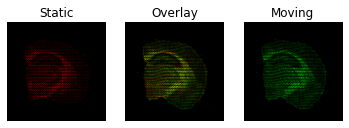

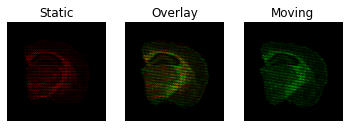

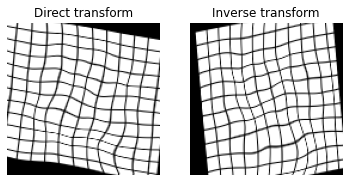

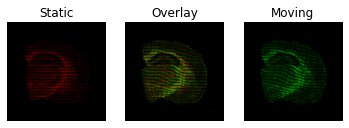

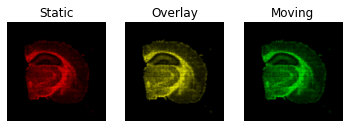

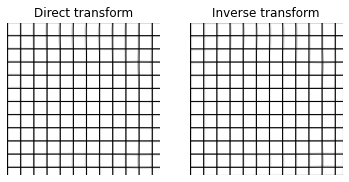

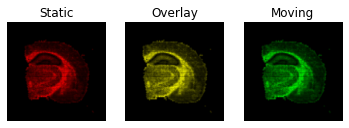

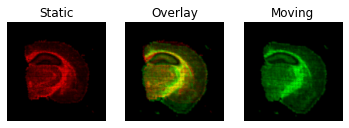

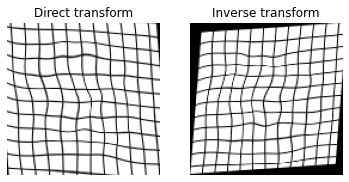

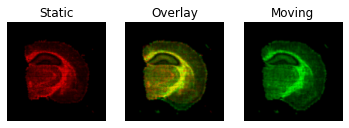

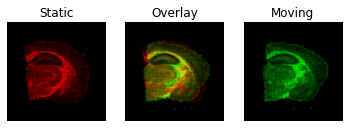

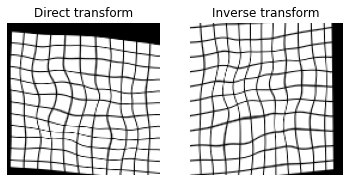

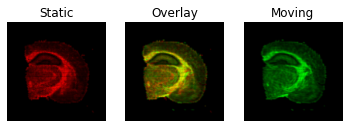

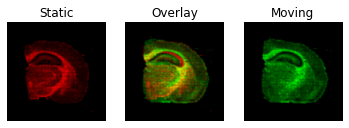

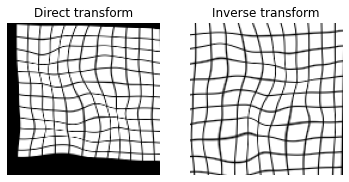

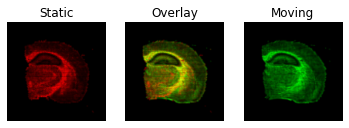

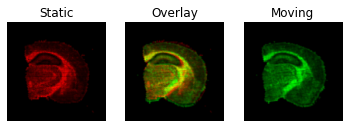

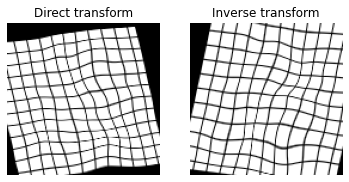

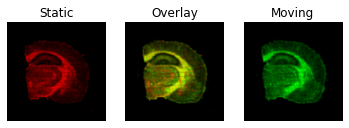

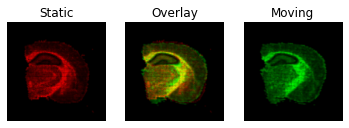

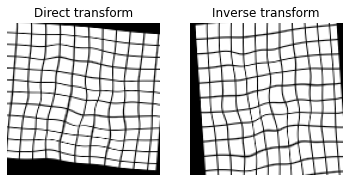

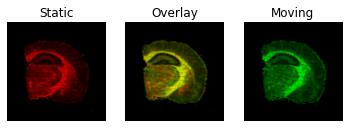

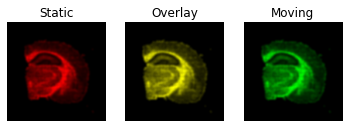

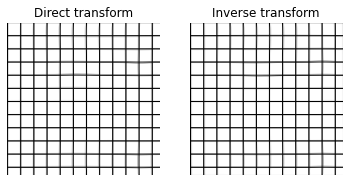

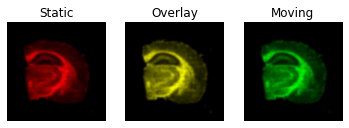

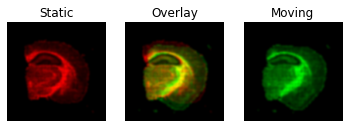

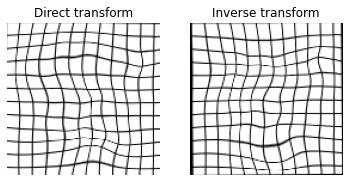

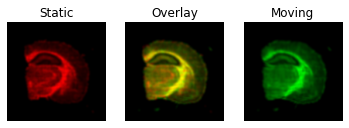

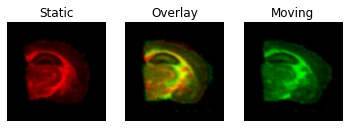

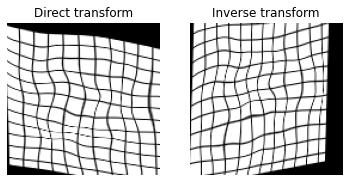

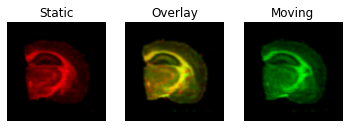

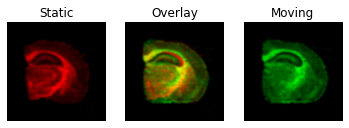

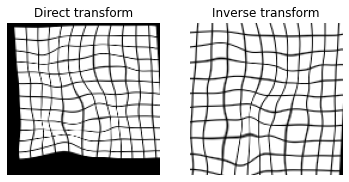

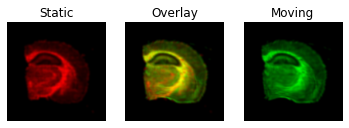

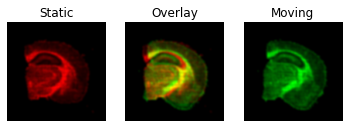

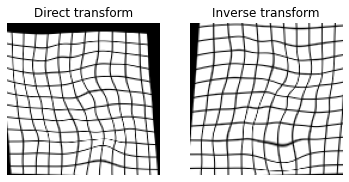

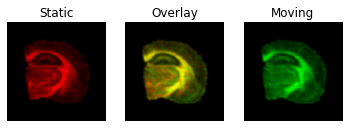

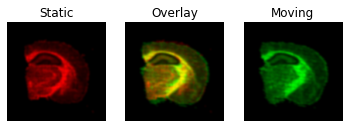

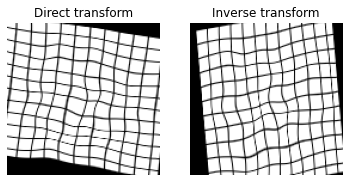

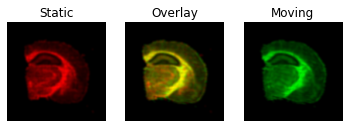

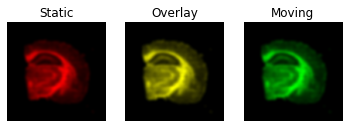

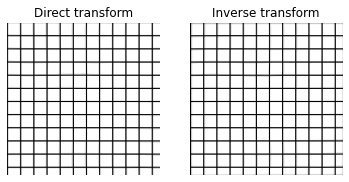

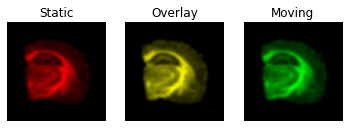

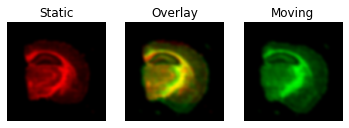

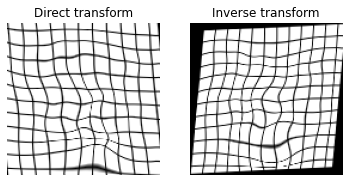

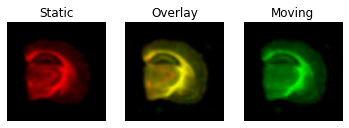

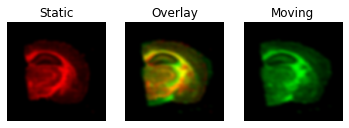

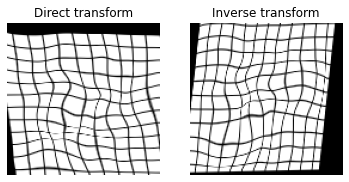

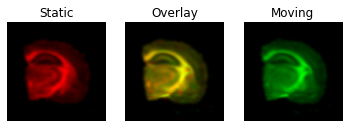

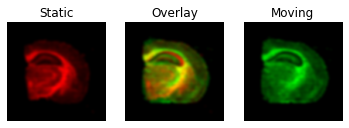

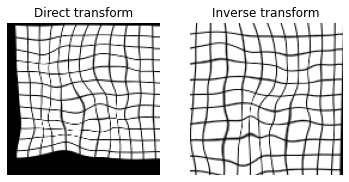

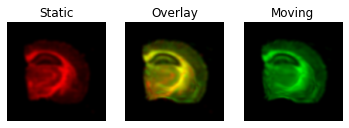

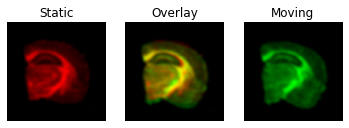

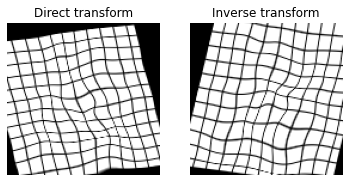

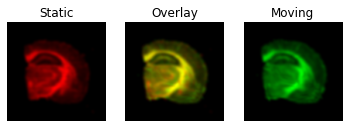

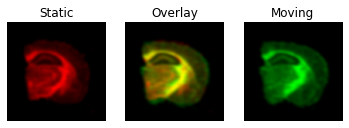

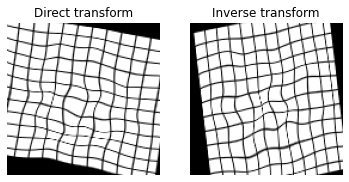

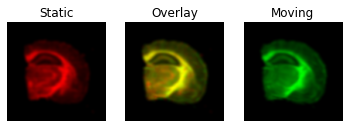

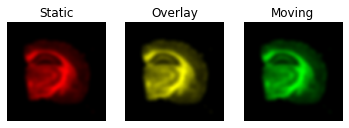

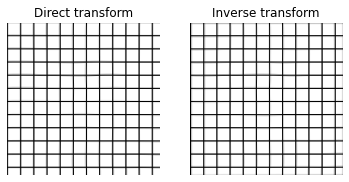

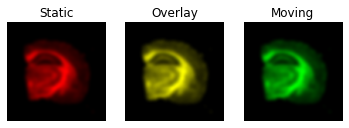

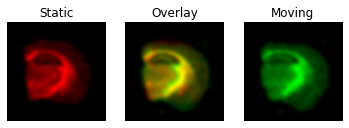

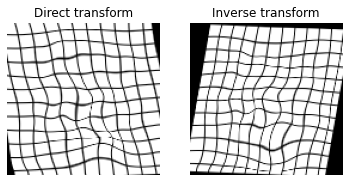

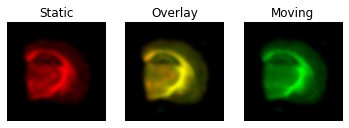

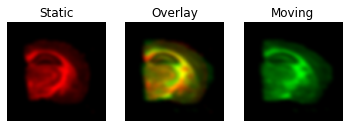

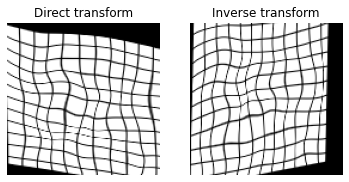

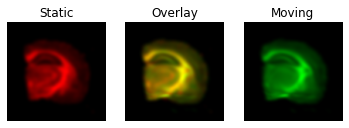

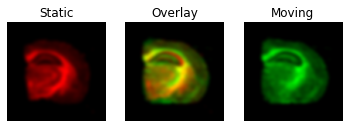

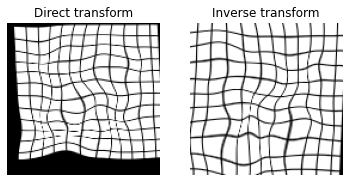

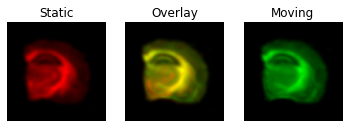

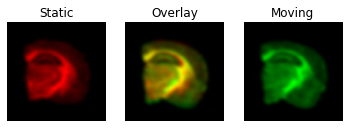

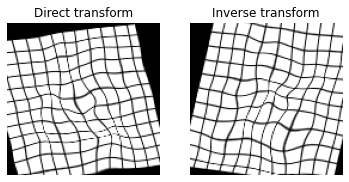

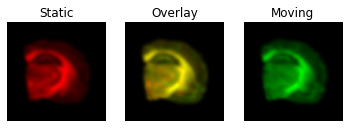

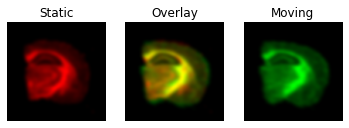

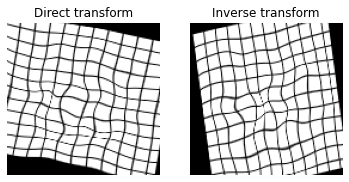

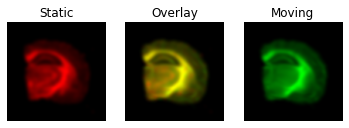

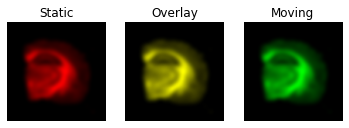

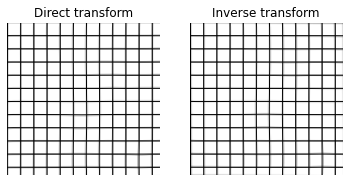

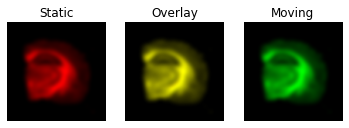

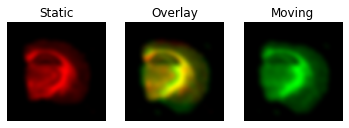

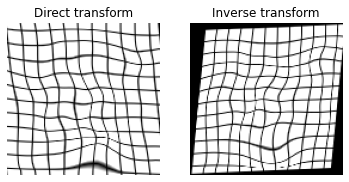

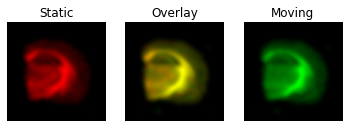

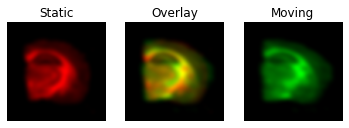

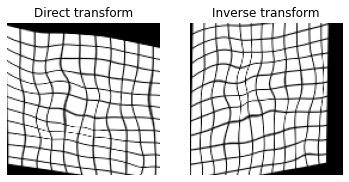

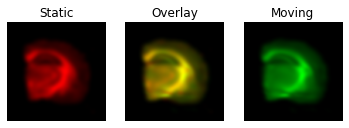

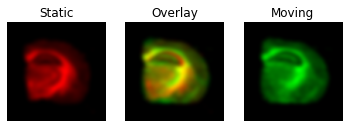

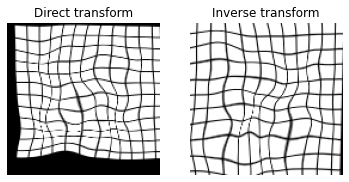

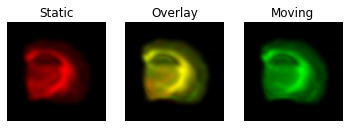

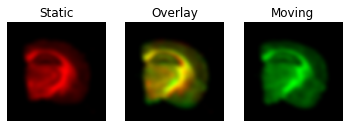

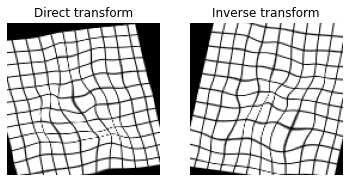

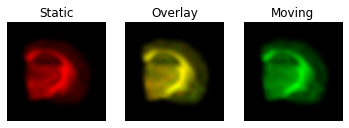

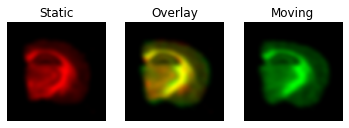

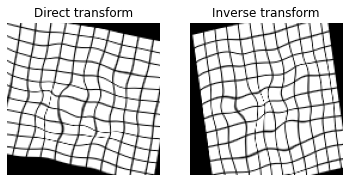

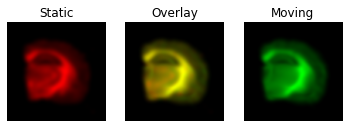

In [13]:
from registration import registration_spatial
from scipy.ndimage import gaussian_filter
from scipy import stats

val_radius = [0.5,1,2,3,4,5]
targetsize = (128,128)

imgs_mols = [] 
for jj, val in enumerate(val_radius):
    im_alls= [] 
    for ii in range(len(adatas)):
        im_alls.append(spatial_imagizer(adatas[ii].obs.hvgall - np.min(adatas[ii].obs.hvgall),
                                       tsimgs[ii],
                                       ts_meta_coords_[ii],
                                       imscales[ii],
                                       radius=spotdists[ii]*val,
                                       alpha=0.01))
        im_alls[ii] = cv2.resize(shape_matching(im_alls[ii], (600,600)), targetsize)
    im_alls_s = []
    mapping_all = []
    for e, img in enumerate(im_alls): # im_alls[0] -> as a ref
        #if e==0: 
        #    im_alls_s.append(img)
        #    continue
        #else:
            iimg1, mapping1 = registration_spatial(im_alls[0], img)
            im_alls_s.append(iimg1)
            mapping_all.append(mapping1)
            
    imgs_mol = mol2imgs(adatas_cor,tsimgs,ts_meta_coords_, imscales, spotdists, 
                    'Cluster0',mapping_all =mapping_all,
                    #sigma=3,
                    tsimg_output=(600,600), targetsize=targetsize, radius_val= val, alpha=0.01)
    print(',,,,,,,,,,',jj+1)
    imgs_mols.append(imgs_mol)

In [14]:
len(imgs_mols)

6

In [15]:
def cosine_sim(a,b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

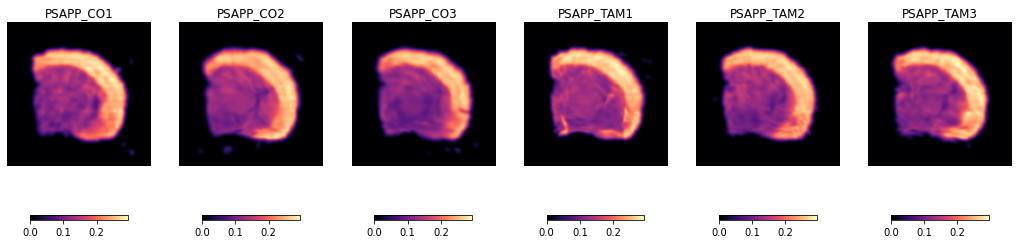

In [16]:
imgs_mol = imgs_mols[3]
plt.figure(figsize=(18,6))
for ii in range(len(imgs_mol)):
    plt.subplot(1,len(imgs_mol),ii+1)
    plt.imshow(imgs_mol[ii],cmap='magma',  vmax=np.max(np.stack(imgs_mol)))
    plt.title(titles[ii])
    plt.axis('off')
    plt.colorbar(fraction=0.015, orientation="horizontal")
    

In [17]:
sim_allpairs_s = dict()
for kk, imgs_mol in enumerate(imgs_mols):
    similarities = np.zeros((len(imgs_mol), len(imgs_mol)))
    for ii in range(len(imgs_mol)):
        for jj in range(len(imgs_mol)):
            cossim = cosine_sim(imgs_mol[ii].flatten(), imgs_mol[jj].flatten())
            similarities[ii,jj] = cossim
    sim_allpairs = similarities[np.triu_indices(len(imgs_mol),1)]
    sim_allpairs_s[val_radius[kk]] = sim_allpairs
    

In [18]:
df_sim_allpairs_s = pd.DataFrame(sim_allpairs_s)

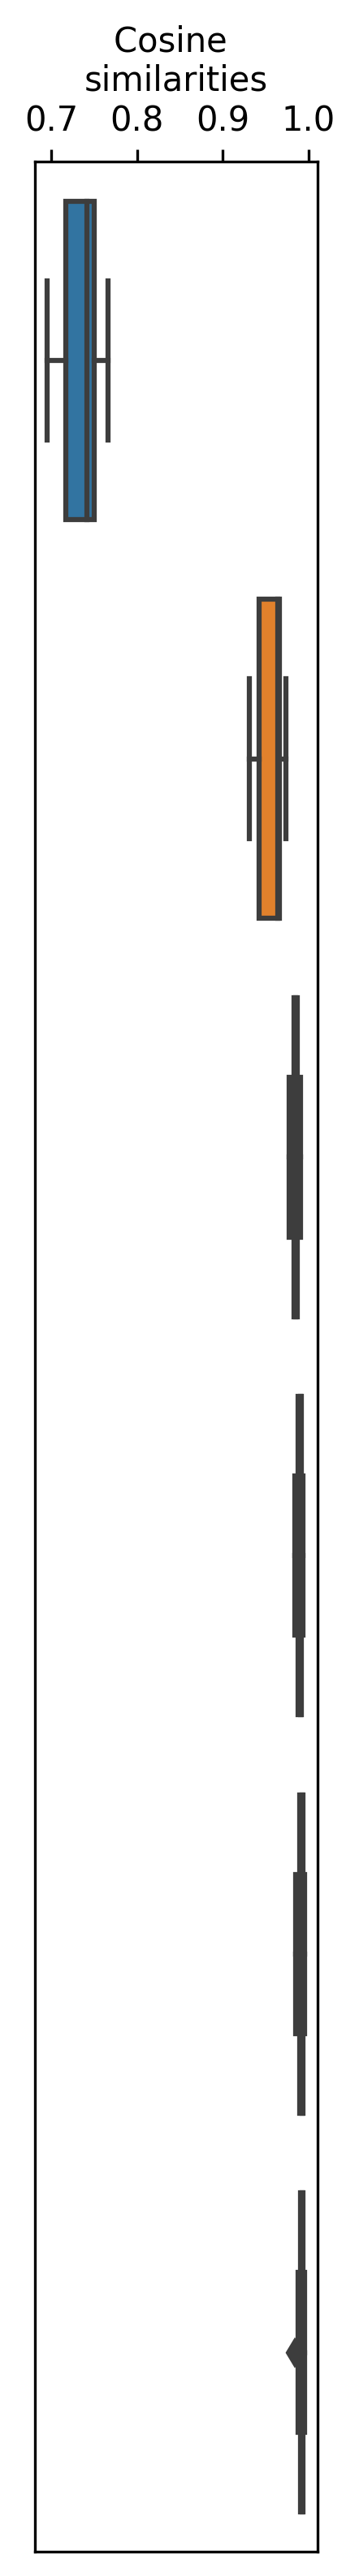

In [36]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

df_alls = df_sim_allpairs_s.melt(var_name='Radius factor (v)', value_name='Cosine \nsimilarities')
plt.figure(figsize=(1.5,13), dpi=300)
ax = sns.boxplot(y='Radius factor (v)', x='Cosine \nsimilarities', data=df_alls,orient='h')
ax.set_yticklabels([])  # Remove the y-axis tick labels.
ax.set_yticks([])  # Remove the y-axis ticks.
ax.set_ylabel('')
ax.xaxis.tick_top()  # Move the x-axis to the top.
ax.xaxis.set_label_position('top')
ax.xaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True, min_n_ticks=4))  # Adjust 'min_n_ticks' as needed


In [77]:
similarities = np.zeros((len(imgs_mol), len(imgs_mol)))
for ii in range(len(imgs_mol)):
    for jj in range(len(imgs_mol)):
        cossim = cosine_sim(imgs_mol[ii].flatten(), imgs_mol[jj].flatten())
        similarities[ii,jj] = cossim

        

0.989 0.007


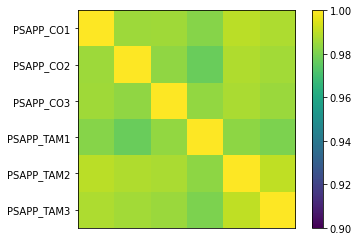

In [81]:
plt.imshow(similarities, vmin=0.9, vmax=1.0)
plt.yticks(ticks=range(len(titles)), labels=titles)
plt.xticks([])
plt.colorbar()
sim_allpairs = similarities[np.triu_indices(len(imgs_mol))]
print(round(np.mean(sim_allpairs),3), round(np.std(sim_allpairs),3))

In [1]:
sim_allpairs

NameError: name 'sim_allpairs' is not defined

COM matching Done
1.8542315139224583
Rigid Transform Done
1.7657411711764666
Affine Registration Done
COM matching Done
0.7642313958632581
Rigid Transform Done
0.8771307884326809
Affine Registration Done
COM matching Done
0.7431000639037771
Rigid Transform Done
0.8577593105930059
Affine Registration Done
COM matching Done
0.7069222996322347
Rigid Transform Done
0.8092334338614173
Affine Registration Done
COM matching Done
0.8377756565163441
Rigid Transform Done
0.8830174947942498
Affine Registration Done
COM matching Done
0.7727518623309362
Rigid Transform Done
0.9312277805379291
Affine Registration Done


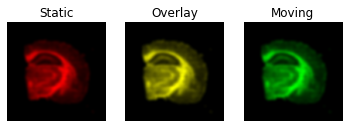

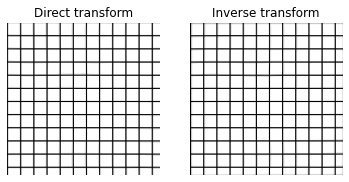

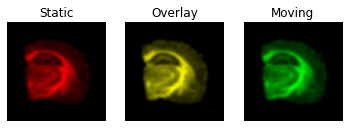

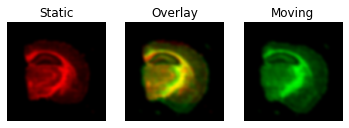

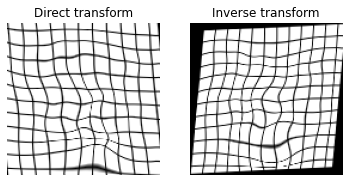

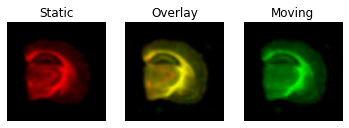

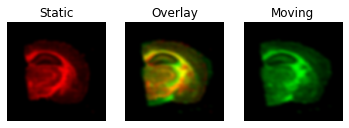

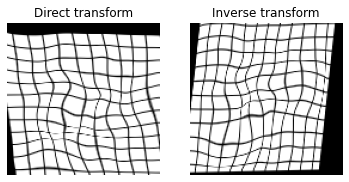

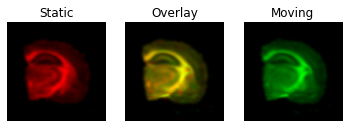

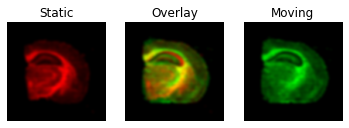

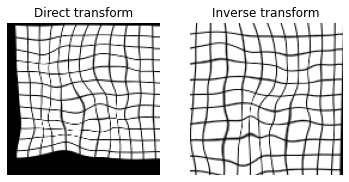

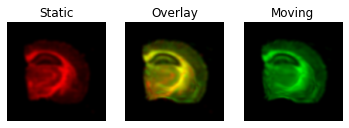

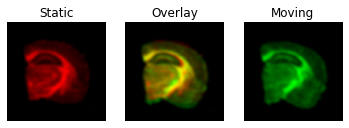

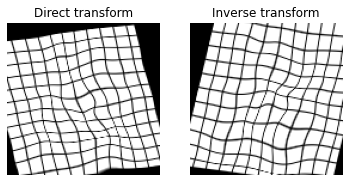

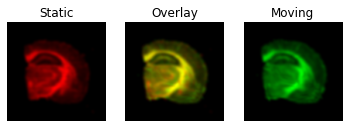

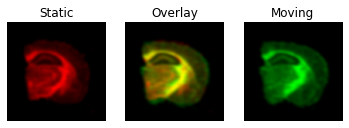

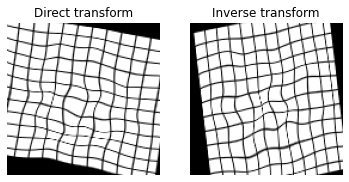

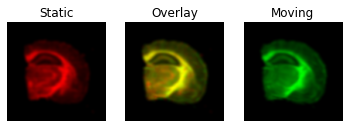

In [17]:
im_alls_s = []
mapping_all = []
for e, img in enumerate(im_alls): # im_alls[0] -> as a ref
    #if e==0: 
    #    im_alls_s.append(img)
    #    continue
    #else:
        iimg1, mapping1 = registration_spatial(im_alls[0], img)
        im_alls_s.append(iimg1)
        mapping_all.append(mapping1)

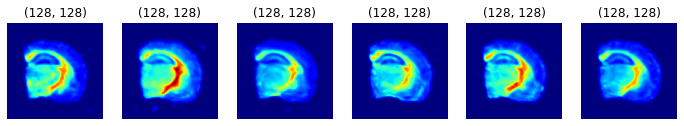

In [18]:
plt.figure(figsize=(12,4))
for ii in range(fignum):
    plt.subplot(1,fignum,ii+1)
    plt.imshow(im_alls_s[ii], cmap='jet',vmin=0,vmax=0.5)
    plt.title(im_alls_s[ii].shape)
    plt.axis('off')

In [26]:
imgs_mol = mol2imgs(adatas,tsimgs,ts_meta_coords_, imscales, spotdists, 
                    'Cst7',mapping_all =mapping_all,
                    sigma=3, tsimg_output=(600,600), targetsize=targetsize)

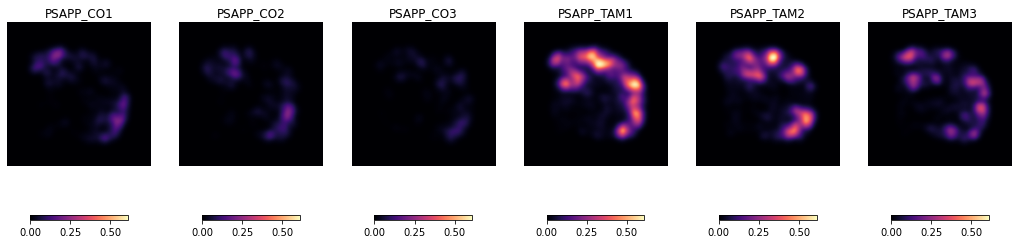

In [27]:
titles=['PSAPP_CO1','PSAPP_CO2','PSAPP_CO3','PSAPP_TAM1','PSAPP_TAM2','PSAPP_TAM3']

plt.figure(figsize=(18,6))
for ii in range(len(imgs_mol)):
    plt.subplot(1,len(imgs_mol),ii+1)
    plt.imshow(imgs_mol[ii],cmap='magma',  vmax=np.max(np.stack(imgs_mol)))
    plt.title(titles[ii])
    plt.axis('off')
    plt.colorbar(fraction=0.015, orientation="horizontal")
    

### Evaluation of registration performance

In [30]:
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)
for adata, lid in zip(adatas_cor, titles):
    adata.obs_names_make_unique()
    adata.obs['library_id'] = lid

Found 32285 genes among all datasets
[[0.         0.62168397 0.33760527 0.49578909 0.42914683 0.13441441]
 [0.         0.         0.28604383 0.53094963 0.68858131 0.10486486]
 [0.         0.         0.         0.45115894 0.28102664 0.86134106]
 [0.         0.         0.         0.         0.69265757 0.45081081]
 [0.         0.         0.         0.         0.         0.50990991]
 [0.         0.         0.         0.         0.         0.        ]]
Processing datasets (2, 5)
Processing datasets (3, 4)
Processing datasets (1, 4)
Processing datasets (0, 1)
Processing datasets (1, 3)
Processing datasets (4, 5)
Processing datasets (0, 3)
Processing datasets (2, 3)
Processing datasets (3, 5)
Processing datasets (0, 4)
Processing datasets (0, 2)
Processing datasets (1, 2)
Processing datasets (2, 4)
Processing datasets (0, 5)
Processing datasets (1, 5)


In [31]:
adata_spatial = sc.concat(adatas_cor)

/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [32]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters", resolution = 0.1)

/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


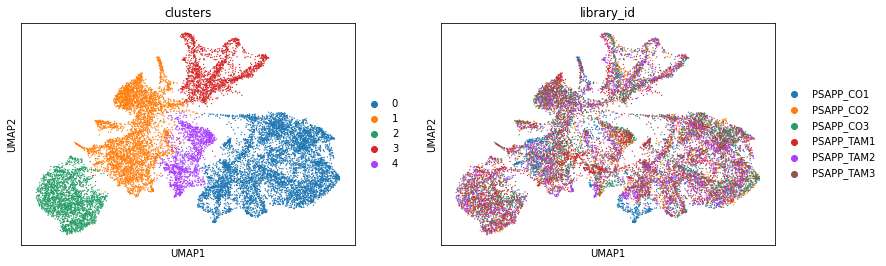

In [33]:
sc.pl.umap(
    adata_spatial, color=["clusters", "library_id"], palette=sc.pl.palettes.default_20
)


In [57]:
sc.tl.rank_genes_groups(adata_spatial, 'clusters', method='wilcoxon')
num_markers = 15
genelists=adata_spatial.uns['rank_genes_groups']['names']
df_genelists = pd.DataFrame.from_records(genelists)
df_markers = df_genelists.head(num_markers)

sc.tl.score_genes(adata_spatial, df_markers['0'].tolist(), score_name = 'C0')
sc.tl.score_genes(adata_spatial, df_markers['1'].tolist(), score_name = 'C1')
sc.tl.score_genes(adata_spatial, df_markers['2'].tolist(), score_name = 'C2')
sc.tl.score_genes(adata_spatial, df_markers['3'].tolist(), score_name = 'C3')

/home/hychoi/anaconda3/envs/tf_h2_2/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [58]:
for jj in ['C0','C1','C2','C3']:
    v= np.asarray(adata_spatial.obs[jj])
    adata_spatial.obs[jj] = (v - v.min()) / (v.max() - v.min())

In [59]:
for adata,lid in zip(adatas_cor, titles):
    adata.obs = adata_spatial[adata_spatial.obs['library_id'] == lid].obs

In [60]:
fig, axs = plt.subplots(1, 6, figsize=(15, 10))

plt.figure(
for jj in ['C0','C1','C2','C3']:
    sc.pl.spatial(
            adatas_cor[0],
            img_key="hires",
            color=jj,
            size=1.5,
            legend_loc=None,
            show=False,
            ax=axs[i],
        )

SyntaxError: invalid syntax (<ipython-input-60-41cfedb988ea>, line 4)

In [47]:
imgs_mol = mol2imgs(adatas_cor,tsimgs,ts_meta_coords_, imscales, spotdists, 
                    'C0',mapping_all =mapping_all,
                    sigma=3, tsimg_output=(600,600), targetsize=targetsize)

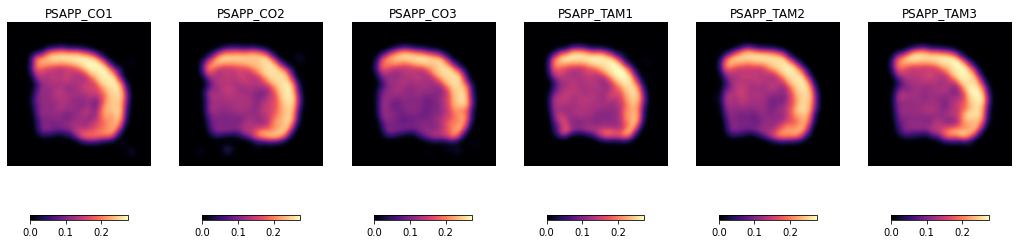

In [48]:
plt.figure(figsize=(18,6))
for ii in range(len(imgs_mol)):
    plt.subplot(1,len(imgs_mol),ii+1)
    plt.imshow(imgs_mol[ii],cmap='magma',  vmax=np.max(np.stack(imgs_mol)))
    plt.title(titles[ii])
    plt.axis('off')
    plt.colorbar(fraction=0.015, orientation="horizontal")
    

In [64]:
thr = np.max(np.asarray(imgs_mol))*0.6
print(thr)

0.1644726812839508


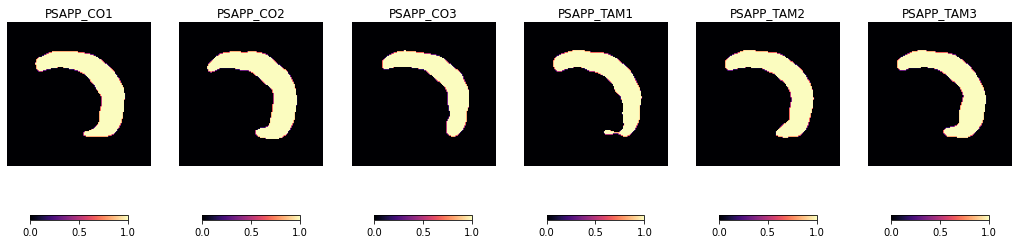

In [65]:
plt.figure(figsize=(18,6))
for ii in range(len(imgs_mol)):
    plt.subplot(1,len(imgs_mol),ii+1)
    plt.imshow(imgs_mol[ii] >thr,cmap='magma')
    plt.title(titles[ii])
    plt.axis('off')
    plt.colorbar(fraction=0.015, orientation="horizontal")

In [66]:
def dice_coef(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    smooth = 0.000001
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

In [68]:
dices = np.zeros((len(imgs_mol), len(imgs_mol)))
for ii in range(len(imgs_mol)):
    for jj in range(len(imgs_mol)):
        dice_val = dice_coef(imgs_mol[ii]>thr, imgs_mol[jj]>thr)
        dices[ii,jj] = dice_val
        
        

0.95 0.038


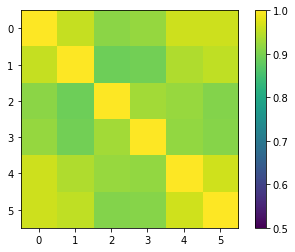

In [73]:
plt.imshow(dices, vmin=0.5, vmax=1)
plt.colorbar()
dices_allpairs = dices[np.triu_indices(len(imgs_mol))]
print(round(np.mean(dices_allpairs),3), round(np.std(dices_allpairs),3))

In [25]:
#GENERATE MASK
imgs_mol_sum = np.sum(np.stack(imgs_mol,axis=-1),axis=-1)
imgs_mol_thr = imgs_mol_sum>0.05
#plt.imshow(imgs_mol_thr)
imgs_mol_idx = np.where(imgs_mol_thr)

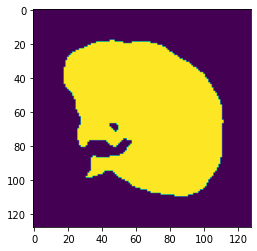

In [26]:
plt.imshow(imgs_mol_thr)

In [34]:
#STATISTICAL PARAMETERIC MAP
imgs_tmap = np.zeros(imgs_mol_sum.shape)

for k in range(len(imgs_mol_idx[0])):
    idxx= imgs_mol_idx[0][k]
    idxy= imgs_mol_idx[1][k]
    tval,pval = stats.ttest_ind([img[idxx,idxy] for img in imgs_mol[3:]],
                            [img[idxx,idxy] for img in imgs_mol[:3]])
    imgs_tmap[idxx,idxy] = tval
    if k%600==0: print("Pixel-wise comparison done for ... ", k)
    

Pixel-wise comparison done for ...  0
Pixel-wise comparison done for ...  600
Pixel-wise comparison done for ...  1200
Pixel-wise comparison done for ...  1800
Pixel-wise comparison done for ...  2400
Pixel-wise comparison done for ...  3000
Pixel-wise comparison done for ...  3600
Pixel-wise comparison done for ...  4200
Pixel-wise comparison done for ...  4800
Pixel-wise comparison done for ...  5400
Pixel-wise comparison done for ...  6000


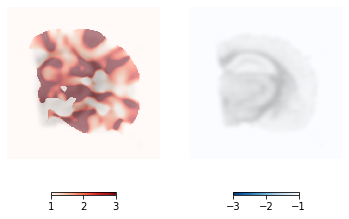

In [36]:
plt.subplot(1,2,1)
plt.imshow(im_alls_s[0],cmap='gray_r',alpha=0.5)
plt.imshow(imgs_tmap, cmap='Reds', vmin=1, vmax=3,alpha=0.5)
plt.axis('off')
plt.colorbar(fraction=0.015, orientation="horizontal")
plt.subplot(1,2,2)
plt.imshow(im_alls_s[0],cmap='gray_r',alpha=0.5)
plt.imshow(imgs_tmap, cmap='Blues_r', vmin=-3, vmax=-1.0,alpha=0.5)
plt.axis('off')
plt.colorbar(fraction=0.015, orientation="horizontal")

### END FOR HERE

### BELOW:: DO NOT USE 